# Importing the data

In [524]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

In [525]:
data=pd.read_csv('https://raw.githubusercontent.com/shaunak09vb/Telco-Customer-Churn-Predicition/master/Churn.csv')

In [526]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [527]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Understanding the data

### Cheking the data for null values

In [528]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking Data Types

In [529]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Treating Total Charges Column

Since total charges is an object type while we need it as type(float). I will perform just one data maipulation task here inorder to get the desired Total Charges column.

In [530]:
data['TotalCharges']=data["TotalCharges"].replace(" ",np.nan)

In [531]:
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

In [532]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

### Exploring Target Labels

In [533]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Exploring Categorical Labels

Getting Discrete and Continuous variables into two different array.

In [534]:
cont=[]
disc=[]

for col in data.columns:
    if data[col].nunique()>5:
        cont.append(col)
        
    else:
        disc.append(col)
        
print ('Continuous variables are ',cont)
print('-----------------------------------')
print ('Discrete variables are ' ,disc)

Continuous variables are  ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
-----------------------------------
Discrete variables are  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [535]:
for col in disc:
  print(data[col].value_counts())
  print('------------------------------------------')

Male      3549
Female    3483
Name: gender, dtype: int64
------------------------------------------
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------------------
No     3639
Yes    3393
Name: Partner, dtype: int64
------------------------------------------
No     4933
Yes    2099
Name: Dependents, dtype: int64
------------------------------------------
Yes    6352
No      680
Name: PhoneService, dtype: int64
------------------------------------------
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
------------------------------------------
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
------------------------------------------
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
------------------------------------------
No                     3087
Yes                    2425
N

In [536]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [537]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

# Data Visualization

### Plotting Categorical Variables

Looking for trends among people who Churn.

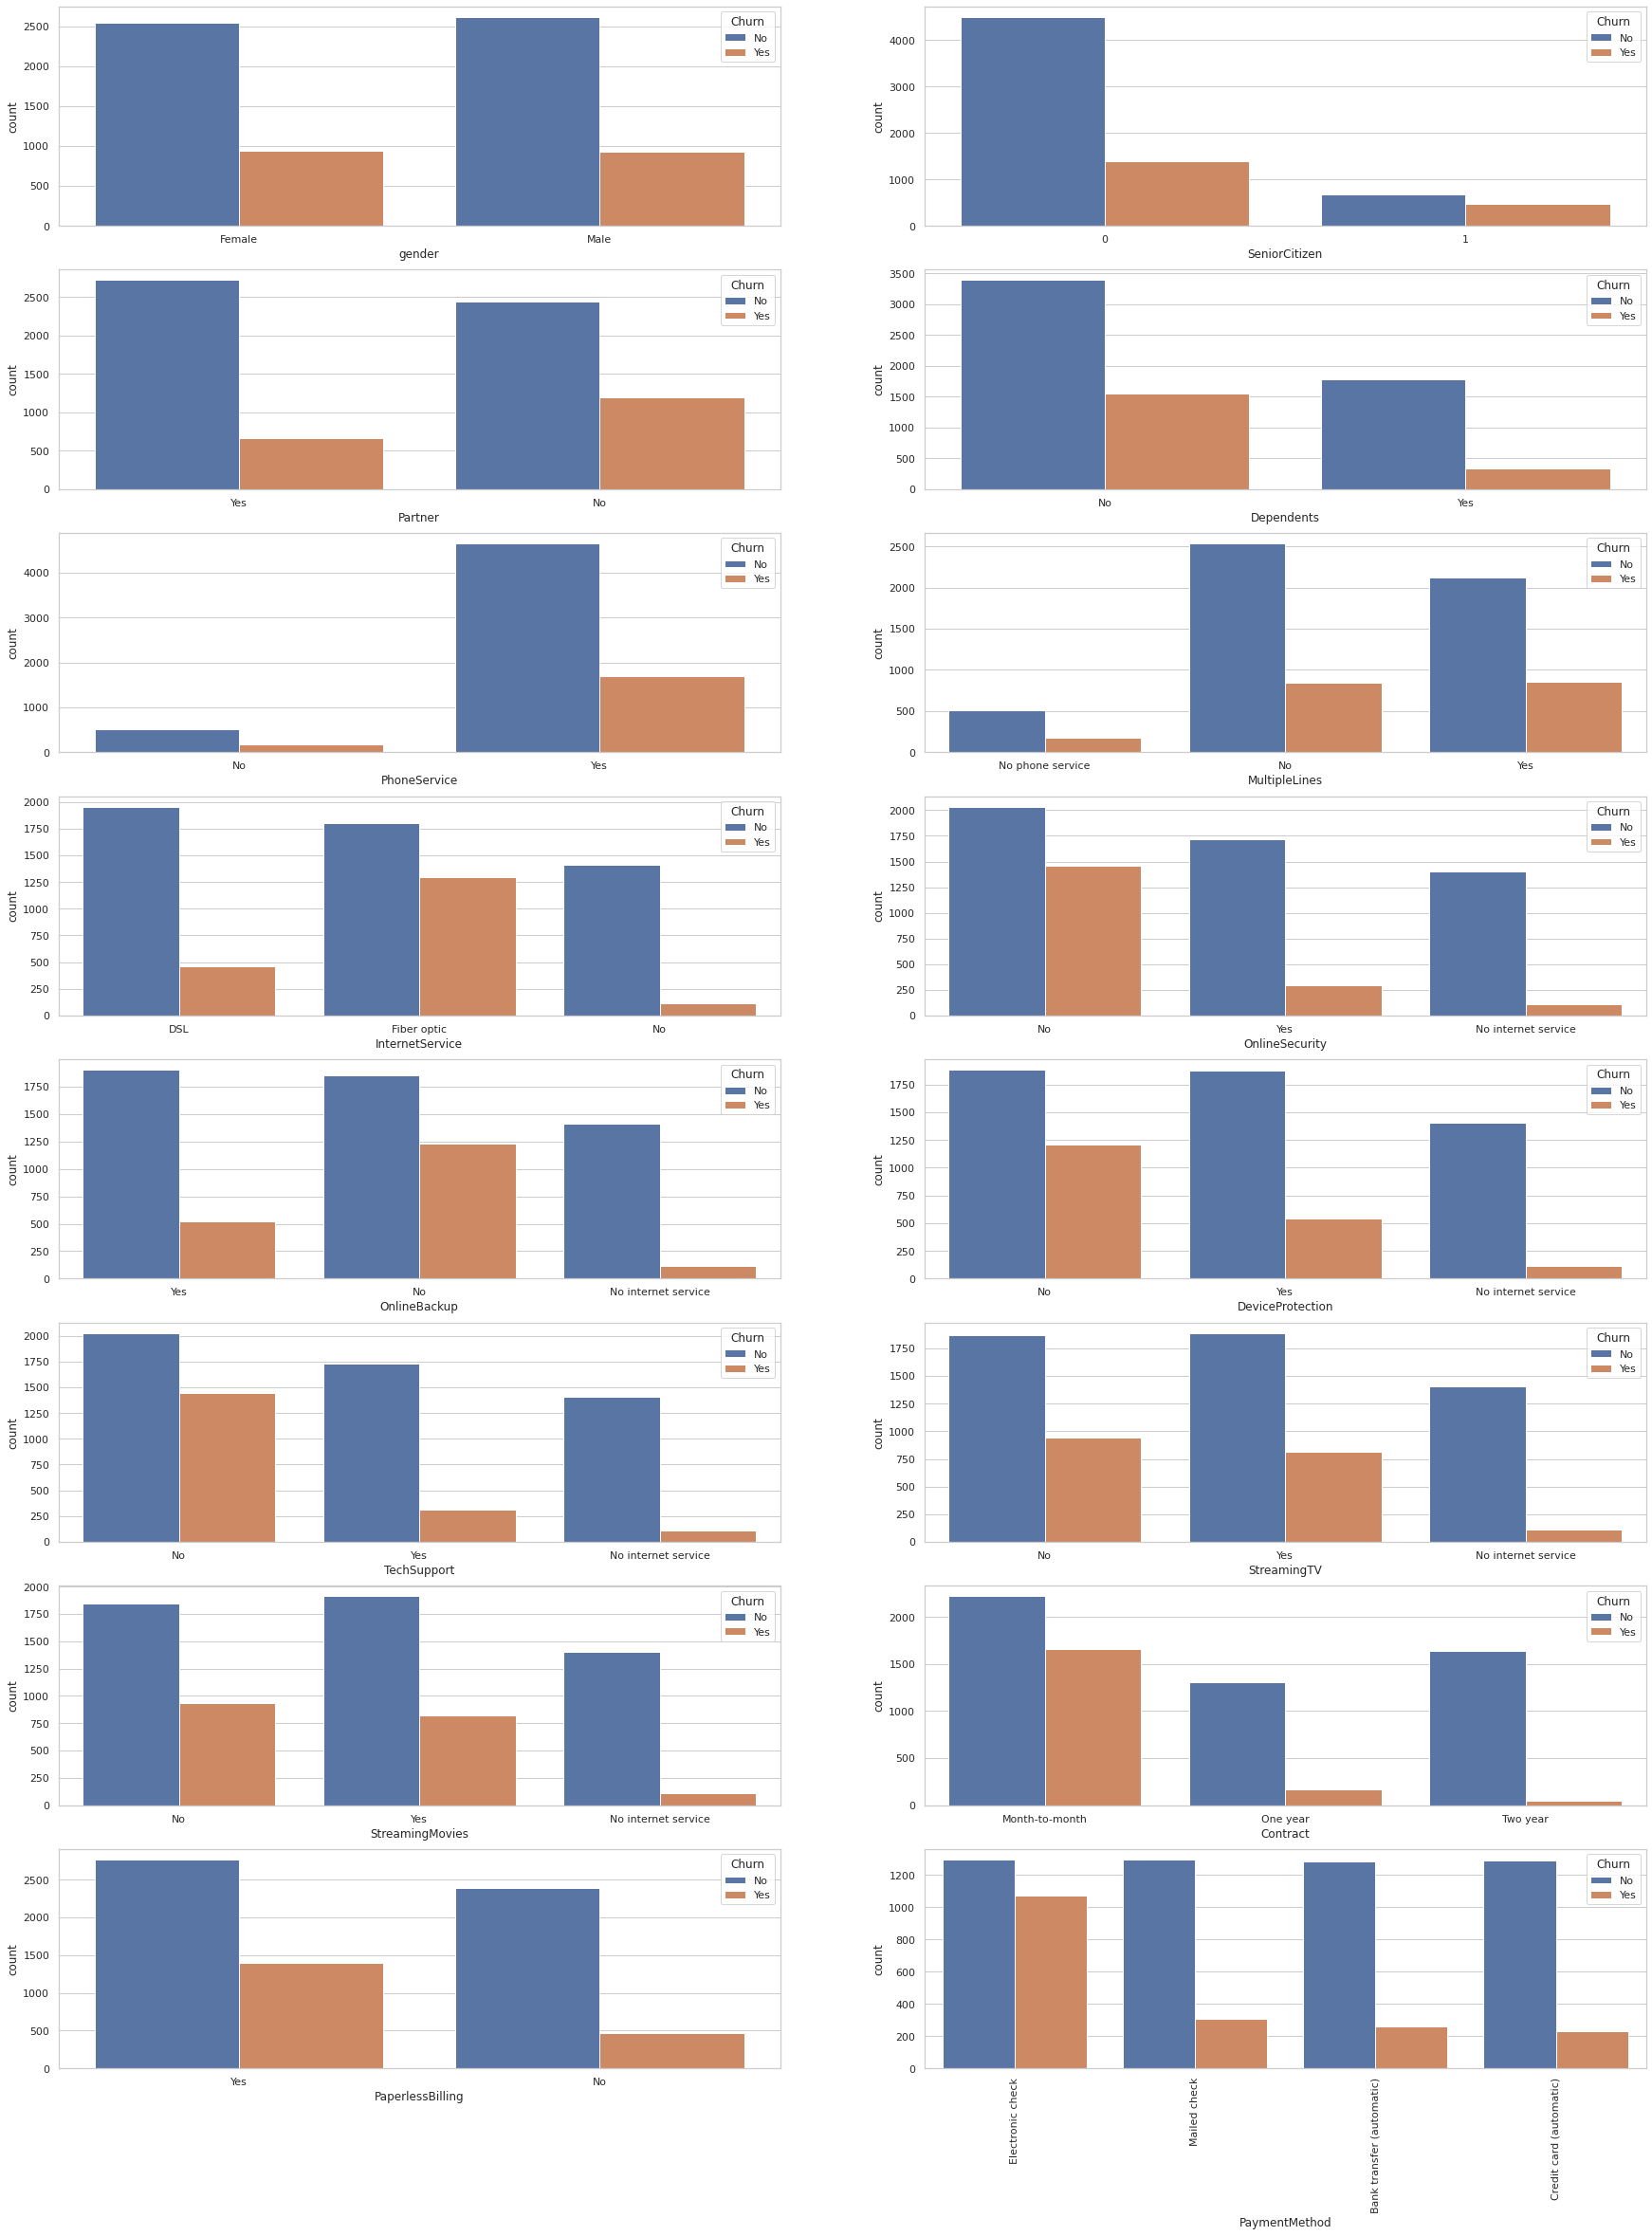

In [538]:
sns.set(style="whitegrid", color_codes=True)

fig, axes = plt.subplots(nrows = 8,ncols = 2,figsize = (30,40))
sns.countplot(x = "gender", data = data, hue=data.Churn, ax=axes[0][0])
sns.countplot(x="SeniorCitizen",data=data,hue=data.Churn, ax=axes[0][1])
sns.countplot(x = "Partner", data = data, hue=data.Churn, ax=axes[1][0])
sns.countplot(x = "Dependents", data = data, hue=data.Churn, ax=axes[1][1])
sns.countplot(x = "PhoneService", data = data, hue=data.Churn, ax=axes[2][0])
sns.countplot(x = "MultipleLines", data = data, hue=data.Churn, ax=axes[2][1])
sns.countplot(x = "InternetService", data = data, hue=data.Churn, ax=axes[3][0])
sns.countplot(x = "OnlineSecurity", data = data, hue=data.Churn, ax=axes[3][1])
sns.countplot(x = "OnlineBackup", data = data, hue=data.Churn, ax=axes[4][0])
sns.countplot(x = "DeviceProtection", data = data, hue=data.Churn, ax=axes[4][1])
sns.countplot(x = "TechSupport", data = data, hue=data.Churn, ax=axes[5][0])
sns.countplot(x = "StreamingTV", data = data, hue=data.Churn, ax=axes[5][1])
sns.countplot(x = "StreamingMovies", data = data, hue=data.Churn, ax=axes[6][0])
sns.countplot(x = "Contract", data = data, hue=data.Churn, ax=axes[6][1])
sns.countplot(x = "PaperlessBilling", data = data, hue=data.Churn, ax=axes[7][0])
ax = sns.countplot(x = "PaymentMethod", data = data, hue=data.Churn, ax=axes[7][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show(fig)

### Plotting Continuous Variables

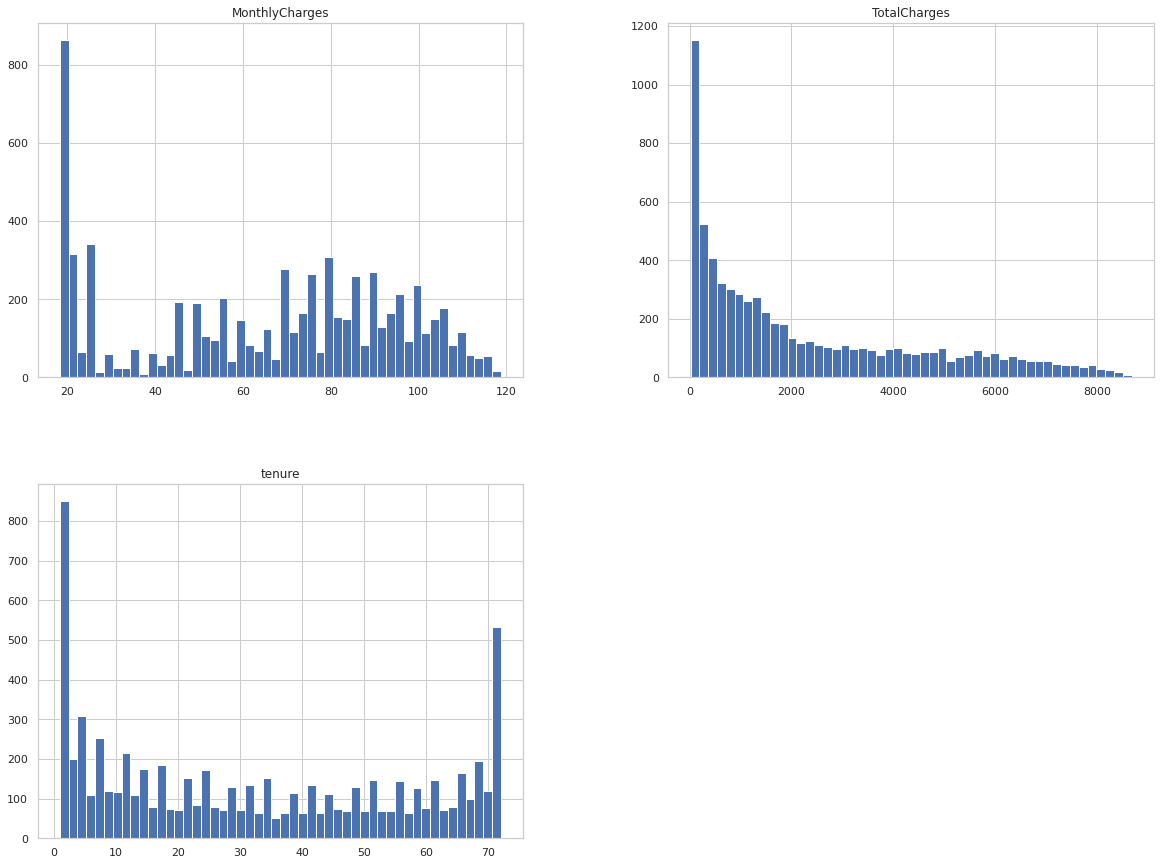

In [539]:
data.hist(cont, bins=50, figsize=(20,15))
plt.show()

### Conclusion

•	Churn is almost comparable in Males and Females.<br>
•	Churn is low among senior citizens.<br>
•	Churn rate is higher in case of customers who have phone services.<br>
•	Churn rate among customers with partners and dependents is lower than customers who don’t have partners & dependents.<br>
•	Customers with an electronic payment method have a higher churn rate compared to other payment methods.<br>
•	Customers with no internet service have a lower churn rate.<br>
•	Churn rate is much higher in case of Fiber Optic InternetServices.<br>



# Data Manipulation

### Dropping Customer Id

In [543]:
data.drop(['customerID'], axis=1, inplace=True)

### Saving Label column in target variable

In [544]:
y=data.Churn

In [545]:
data.drop(['Churn'], axis=1, inplace=True)

###Converting columns into One-hot encoded equivalent

In [546]:
data=pd.get_dummies(data)

In [547]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# Implement Machine Learning Models

### Train-Test Split

In [578]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20,random_state=83)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5625, 45) (5625,)
(1407, 45) (1407,)


In [579]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2520,0,72,97.75,6991.60,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
6290,0,52,80.95,4233.95,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
5313,0,26,81.90,2078.55,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
4706,0,65,90.45,5957.90,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
6373,0,38,74.05,2802.30,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0


In [580]:
y_train.head()

2520    No
6290    No
5313    No
4706    No
6373    No
Name: Churn, dtype: object

### Logistic Regression

In [581]:
logmodel=LogisticRegression(max_iter=200,C=1,solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [582]:
pred1 = logmodel.predict(X_test)
print('Accuracy of Logistic Regression on test set:',accuracy_score(y_test, pred1))

Accuracy of Logistic Regression on test set: 0.8159203980099502


In [583]:
results1=confusion_matrix(y_test, pred1)
print(results1)

[[959 101]
 [158 189]]
